# Proyecto Telecom

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

 Asimismo, el objetivo principal de este proyecto es contruir un modelo que sea capaz de predecir la tasa de cancelación de la empresa de servicios de comunicación.

## 1. Cargamos las librerías y las tablas

Aquí además revisaremos la información general de las tablas.

In [ ]:
# Cargamos librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV

!pip install catboost
from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier

!pip install shap
import shap

pd.set_option('display.max_columns', 50)

In [ ]:
# Cargamos las tablas
contract = pd.read_csv("contract.csv")
internet = pd.read_csv("internet.csv")
personal = pd.read_csv("personal.csv")
phone = pd.read_csv("phone.csv")

In [ ]:
# Revisamos tamaño de las tablas
dfs = [contract, internet, personal, phone]

for i in dfs:
  print(i.shape)

(7043, 8)
(5517, 8)
(7043, 5)
(6361, 2)


In [ ]:
# Revisamos las tablas
contract.head(20)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95


In [ ]:
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [ ]:
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [ ]:
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [ ]:
# Revisamos la información general de cada tabla
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [ ]:
personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [ ]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


La mayoría de los valores son de tipo object y el formato es correcto. Sin embargo hay una columna numérica (contract["TotalCharges"]) en formato object que analizaremos más adelante.

## 2. Realizamos la limpieza de los datos

A continuación abordaremos valores ausentes, duplicados, formato de nombres de columnas y valores extraños que puedan haber.

In [ ]:
# Revisamos si hay valores nulos en las tablas
for i in dfs:
  print(i.isna().sum())

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64
customerID       0
MultipleLines    0
dtype: int64


In [ ]:
# Revisamos valores duplicados
for i in dfs:
  print(i.duplicated().sum())

0
0
0
0


In [ ]:
# Revisamos formatos de nombres de columnas
for i in dfs:
  print(i.columns.tolist())

['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
['customerID', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']
['customerID', 'MultipleLines']


Ahora analizaremos los valores de algunas de las columnas para ver si hay datos extraños. Esto no lo aplicaremos a columnas como 'customerID', columnas de fechas o numéricas.

In [ ]:
# Revisamos los datos de contract

print(contract.Type.value_counts())
print()
print(contract.PaperlessBilling.value_counts())
print()
print(contract.PaymentMethod.value_counts())


Month-to-month    3875
Two year          1695
One year          1473
Name: Type, dtype: int64

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


En esta tabla la columna "TotalCharges" es de tipo object. Lo abordaremos ahora mismo.

In [ ]:
# Primero pasaremos todos los valores numéricos a formato numérico
## Los valores no numéricos serán convertidos en NaN con el argumento errors='coerce'
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')

In [ ]:
# Revisamos valores ausentes
contract['TotalCharges'].isna().sum()

11

Habían 11 valores que no eran números. Estos los dejaremos como 0.

In [ ]:
# Imputamos valores ausentes
contract['TotalCharges'] = contract['TotalCharges'].fillna(0)

In [ ]:
# Revisamos los cambios
contract['TotalCharges'].isna().sum()

0

A continuación revisamos los valores de 'internet'

In [ ]:
# Revisamos valores de internet
internet.apply(lambda x: x.unique())

customerID          [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
InternetService                                    [DSL, Fiber optic]
OnlineSecurity                                              [No, Yes]
OnlineBackup                                                [Yes, No]
DeviceProtection                                            [No, Yes]
TechSupport                                                 [No, Yes]
StreamingTV                                                 [No, Yes]
StreamingMovies                                             [No, Yes]
dtype: object

En esta tabla está todo en orden.
Sigamos con 'personal'.

In [ ]:
# Revisamos valores de personal
personal.apply(lambda x: x.unique())

customerID       [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
gender                                              [Female, Male]
SeniorCitizen                                               [0, 1]
Partner                                                  [Yes, No]
Dependents                                               [No, Yes]
dtype: object

Todo se ve bien.
Por último revisamos los valores de 'phone'

In [ ]:
# Revisamos valores de phone
phone.apply(lambda x: x.unique())

customerID       [5575-GNVDE, 3668-QPYBK, 9237-HQITU, 9305-CDSK...
MultipleLines                                            [No, Yes]
dtype: object

Por aquí también está todo OK

Al revisar las tablas hicimos los siguientes hallazgos:

1.   No hay valores ausentes.
2.   No hay valores duplicados.
3.   Algunos de las letras de los nombres de las columnas están en mayúsculas, dejaremos todas en minúsculas.
4.   Todos los formatos de las columnas estaban bien, a excepción de la columna 'contract["TotalCharges"]' que estaba en formato object, siendo una columna de valores numéricos, cuyos valores extraños fueron abordados.




In [ ]:
# Corregimos los nombres de las columnas de las tablas
personal.columns = personal.columns.str.lower()
contract.columns = contract.columns.str.lower()
internet.columns = internet.columns.str.lower()
phone.columns = phone.columns.str.lower()

In [ ]:
# Revisamos los cambios
for names in dfs:
  print(names.columns.tolist())

['customerid', 'begindate', 'enddate', 'type', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges']
['customerid', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']
['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents']
['customerid', 'multiplelines']


Ahora que ya realizamos la limpieza de los datos continuaremos con el EDA!

## 3. Análisis exploratorio de los datos (EDA)


Primero revisaremos si existe un desbalance de clases.Luego observaremos la distribución de los datos numéricos, así como sus valores atípicos.


In [ ]:
# Primero revisaremos la columna target
contract["enddate"]

0                        No
1                        No
2       2019-12-01 00:00:00
3                        No
4       2019-11-01 00:00:00
               ...         
7038                     No
7039                     No
7040                     No
7041    2019-11-01 00:00:00
7042                     No
Name: enddate, Length: 7043, dtype: object

Siendo que el target consta de valores binarios "No" y fechas, crearemos una nueva columna con los valores etiquetados. 0 para "No" y 1 para las fechas de salida de los usuarios.

In [ ]:
# Etiquetamos el target
contract["target"] = (contract["enddate"] != "No").astype("int")

In [ ]:
# Revisamos si existe un desbalance de clases
desb = contract.target.value_counts()
desb

0    5174
1    1869
Name: target, dtype: int64

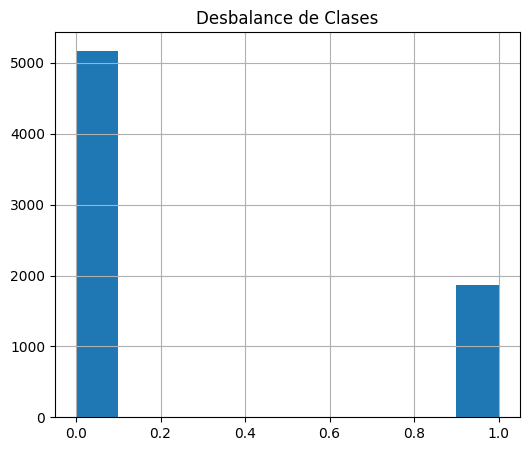

In [ ]:
# Graficamos el target
plt.figure(figsize=(6, 5))
contract["target"].hist()
plt.title("Desbalance de Clases")
plt.show()


Como podemos observar, existe un claro desbalance en las clases. La estrategia que podemos utilizar aquí es aprovechar el potencial de los algoritmos LightGMB y CATBoost que incluyen herramientas para tratar con este problema.



Ahora veremos cómo se distribuyen los valores de 'totalcharges' y 'monthlycharges'.

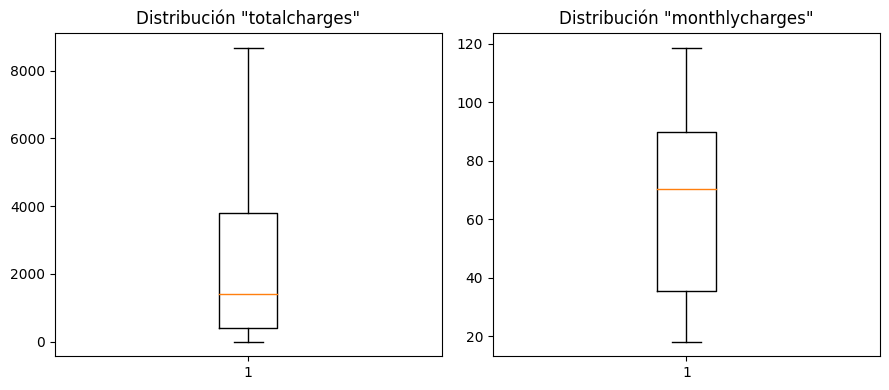

In [ ]:
# Graficamos la distribución de totalcharges y monthlycharges

fig, axs = plt.subplots(1, 2, figsize=(9, 4))

axs[0].boxplot(contract['totalcharges'])
axs[0].set_title('Distribución "totalcharges"')

axs[1].boxplot(contract['monthlycharges'])
axs[1].set_title('Distribución "monthlycharges"')

plt.tight_layout()

plt.show()


Al observar los gráficos podemos ver que no hay valores atípicos.

Además sería interesante visualizar cómo se distribuyen los pagos mensuales y totales entre los clientes que dejaron el servicio y los que no.

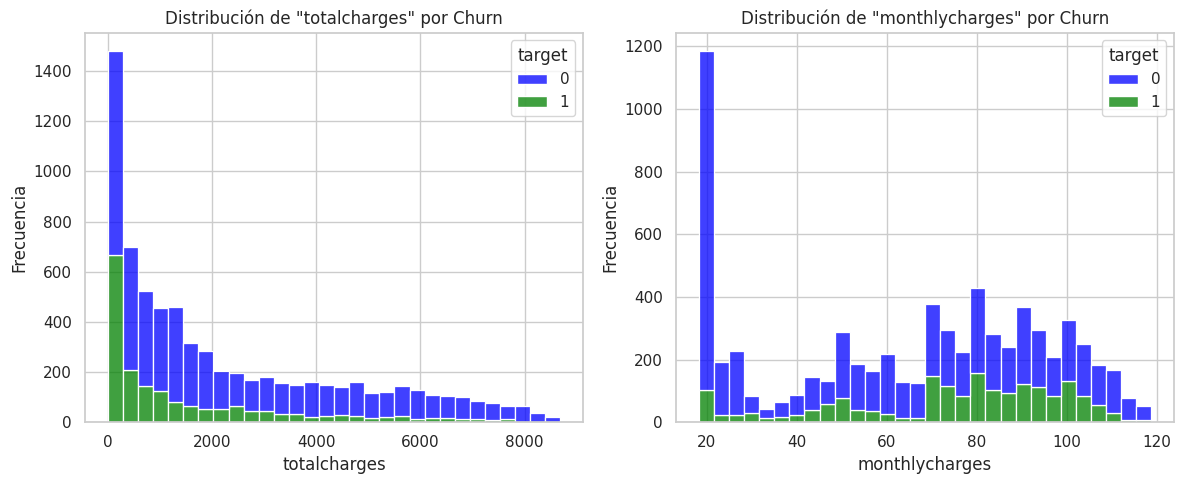

In [ ]:
# Distribución por churn

sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=contract, x='totalcharges', bins=30, hue='target', multiple='stack', ax=axes[0], palette={0: 'blue', 1: 'green'})
axes[0].set_title('Distribución de "totalcharges" por Churn')
axes[0].set_ylabel('Frecuencia')

sns.histplot(data=contract, x='monthlycharges', bins=30, hue='target', multiple='stack', ax=axes[1], palette={0: 'blue', 1: 'green'})
axes[1].set_title('Distribución de "monthlycharges" por Churn')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Como era de esperar, en ambos casos los costes son más bajos para los clientes que descontinuaron el servicio.

Por otra parte, sería interesante ver cómo se distribuyen los costos totales en relación a churn y al tipo de pago ("type) es decir, mensual, anual y a dos años.

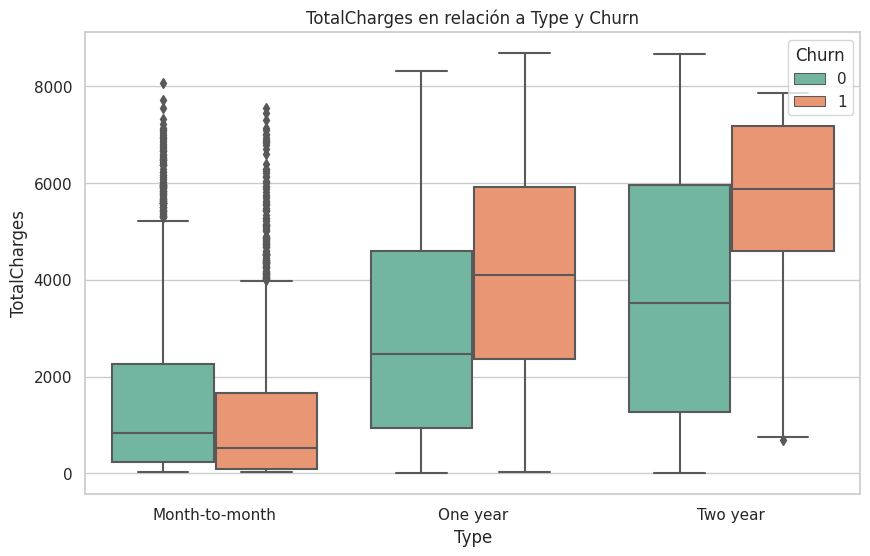

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='totalcharges', data=contract, hue='target', palette='Set2')
plt.title('TotalCharges en relación a Type y Churn')
plt.xlabel('Type')
plt.ylabel('TotalCharges')
plt.legend(title='Churn', loc='upper right')
plt.show()

Si nos fijamos en la distribución de los costos totales en relación a los pagos mensuales, podemos ver que por alguna razón hay valores que alcanzan hasta los 8.000. Veamos por qué ocurre esto.

In [ ]:
monthly_high_cost = contract[(contract.type == "Month-to-month") & (contract.totalcharges > 5000)]
monthly_high_cost.head(10)

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,target
13,0280-XJGEX,2015-09-01,2019-10-01 00:00:00,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1
61,1215-FIGMP,2015-02-01,No,Month-to-month,Yes,Bank transfer (automatic),89.90,5450.70,0
93,6067-NGCEU,2014-09-01,No,Month-to-month,Yes,Credit card (automatic),111.05,7107.00,0
110,0486-HECZI,2015-05-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,96.75,5238.90,1
197,6168-YBYNP,2015-03-01,No,Month-to-month,Yes,Electronic check,111.35,6519.75,0
243,9058-HRZSV,2014-09-01,No,Month-to-month,No,Electronic check,94.40,6126.15,0
276,4484-GLZOU,2015-09-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,105.05,5624.85,1
325,4983-CLMLV,2015-10-01,No,Month-to-month,Yes,Credit card (automatic),102.70,5138.10,0
339,1343-EHPYB,2014-09-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,103.40,6603.00,1
402,0979-PHULV,2014-03-01,2019-12-01 00:00:00,Month-to-month,Yes,Credit card (automatic),99.45,7007.60,1


In [ ]:
monthly_high_cost.tail(10)

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,target
6819,3005-NFMTA,2015-04-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,98.80,5617.75,1
6820,6300-BWMJX,2015-03-01,No,Month-to-month,No,Electronic check,93.35,5386.50,0
6824,8444-WRIDW,2014-05-01,2019-11-01 00:00:00,Month-to-month,Yes,Credit card (automatic),80.45,5224.35,1
6853,9079-YEXQJ,2015-07-01,2020-01-01 00:00:00,Month-to-month,No,Electronic check,111.10,6014.85,1
6857,1930-WNXSB,2015-04-01,No,Month-to-month,Yes,Electronic check,92.85,5305.05,0
6871,4070-OKWVH,2015-10-01,No,Month-to-month,No,Bank transfer (automatic),94.60,5025.80,0
6952,6394-MFYNG,2015-10-01,2019-10-01 00:00:00,Month-to-month,Yes,Bank transfer (automatic),107.40,5121.30,1
6965,7789-CRUVC,2015-01-01,No,Month-to-month,Yes,Credit card (automatic),94.20,5895.45,0
7023,1035-IPQPU,2014-11-01,No,Month-to-month,Yes,Electronic check,103.50,6479.40,0
7034,0639-TSIQW,2014-03-01,2019-10-01 00:00:00,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,1


Como podemos ver son totales altos debido a que son costos de clientes que llevan varios años con la compañía.

Ya que está todo aclarado juntaremos las tablas, etiquetaremos los datos, seleccionaremos las características y entrenaremos los modelos.

In [ ]:
# Unimos las tablas con left join
df = pd.merge(internet, contract, on='customerid', how='left')
df = pd.merge(df, phone, on='customerid', how='left')
df = pd.merge(df, personal, on='customerid', how='left')

In [ ]:
# Revisamos posibles valores ausentes
df.isna().sum()

customerid            0
internetservice       0
onlinesecurity        0
onlinebackup          0
deviceprotection      0
techsupport           0
streamingtv           0
streamingmovies       0
begindate             0
enddate               0
type                  0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          0
target                0
multiplelines       682
gender                0
seniorcitizen         0
partner               0
dependents            0
dtype: int64

In [ ]:
# Echamos un vistazo
nan_values = df[df.isna().any(axis=1)]
nan_values

,customerid,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,target,multiplelines,gender,seniorcitizen,partner,dependents
0,7590-VHVEG,DSL,No,Yes,No,No,No,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,NaN,Female,0,Yes,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,NaN,Male,0,No,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.90,0,NaN,Female,0,No,No
18,8779-QRDMV,DSL,No,No,Yes,No,No,Yes,2019-11-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,39.65,39.65,1,NaN,Male,1,No,No
23,8665-UTDHZ,DSL,No,Yes,No,No,No,No,2019-11-01,2019-12-01 00:00:00,Month-to-month,No,Electronic check,30.20,30.20,1,NaN,Male,0,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5483,4501-VCPFK,DSL,No,No,Yes,Yes,No,No,2017-12-01,No,Month-to-month,No,Electronic check,35.75,1022.50,0,NaN,Male,0,No,No
5486,2274-XUATA,DSL,Yes,Yes,Yes,Yes,Yes,Yes,2014-02-01,No,Two year,Yes,Bank transfer (automatic),63.10,4685.55,0,NaN,Male,1,Yes,No
5505,2235-DWLJU,DSL,No,No,No,No,Yes,Yes,2019-08-01,No,Month-to-month,Yes,Electronic check,44.40,263.05,0,NaN,Female,1,No,No
5511,7750-EYXWZ,DSL,No,Yes,Yes,Yes,Yes,Yes,2019-02-01,No,One year,No,Electronic check,60.65,743.30,0,NaN,Female,0,No,No


Para no perder esta información, podríamos simplemente imputar aquellos NaN con 'unknown'.

In [ ]:
# Imputamos
df.multiplelines.fillna("unknown", inplace=True)

Por último agregaremos 3 columnas numéricas a partir de la columna 'begindate'.

In [ ]:
# Creamos las 3 columnas
df['begindate'] = pd.to_datetime(df['begindate'])

df['day'] = df['begindate'].dt.day.astype(int)
df['month'] = df['begindate'].dt.month.astype(int)
df['year'] = df['begindate'].dt.year.astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5517 entries, 0 to 5516
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        5517 non-null   object        
 1   internetservice   5517 non-null   object        
 2   onlinesecurity    5517 non-null   object        
 3   onlinebackup      5517 non-null   object        
 4   deviceprotection  5517 non-null   object        
 5   techsupport       5517 non-null   object        
 6   streamingtv       5517 non-null   object        
 7   streamingmovies   5517 non-null   object        
 8   begindate         5517 non-null   datetime64[ns]
 9   enddate           5517 non-null   object        
 10  type              5517 non-null   object        
 11  paperlessbilling  5517 non-null   object        
 12  paymentmethod     5517 non-null   object        
 13  monthlycharges    5517 non-null   float64       
 14  totalcharges      5517 n

## 4. Etiquetado de datos

En este caso crearemos conjuntos con target encoder y ordinal encoder, para ver cuál dará el mejor rendimiento.

In [ ]:
# Separamos los datos en conjuntos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
  df.drop(columns=["begindate", "enddate", "customerid"]),
  df["target"],
  test_size=0.20,
  random_state=42
)

### Target Encoder

In [ ]:
# Aplicamos target encoding
encoded_columns = ["internetservice", "onlinesecurity", "onlinebackup",
                   "deviceprotection", "techsupport", "streamingtv",
                   "streamingmovies", "type", "paperlessbilling",
                   "paymentmethod", "multiplelines", "gender",
                   "partner", "dependents"]
encoded_X_train = X_train.copy()
encoded_X_test = X_test.copy()

for col in encoded_columns:
    tmp_target_means = X_train.groupby(col)["target"].mean().reset_index().rename(columns={"target": f"{col}_target_enc"})

    encoded_X_train = (
        encoded_X_train
        .merge(tmp_target_means, on=col, how="left")
    )
    encoded_X_test = (
        encoded_X_test
        .merge(tmp_target_means, on=col, how="left")
    )

encoded_X_train.drop(columns=encoded_columns, inplace=True)
encoded_X_test.drop(columns=encoded_columns, inplace=True)

In [ ]:
# Revisamos los resultados del target encoder
encoded_X_train.head()

,monthlycharges,totalcharges,target,seniorcitizen,day,month,year,internetservice_target_enc,onlinesecurity_target_enc,onlinebackup_target_enc,deviceprotection_target_enc,techsupport_target_enc,streamingtv_target_enc,streamingmovies_target_enc,type_target_enc,paperlessbilling_target_enc,paymentmethod_target_enc,multiplelines_target_enc,gender_target_enc,partner_target_enc,dependents_target_enc
0,94.40,2838.70,1,0,1,6,2017,0.415209,0.146012,0.213632,0.390656,0.409900,0.298099,0.334376,0.46027,0.363421,0.480651,0.311522,0.311461,0.236891,0.200858
1,45.00,1242.45,0,0,1,9,2017,0.190890,0.146012,0.213632,0.219689,0.151402,0.332890,0.334376,0.46027,0.363421,0.259259,0.252236,0.311461,0.389987,0.200858
2,80.45,583.45,1,1,1,4,2019,0.415209,0.415379,0.398038,0.390656,0.409900,0.298099,0.334376,0.46027,0.363421,0.180873,0.341547,0.311461,0.236891,0.200858
3,78.90,1348.95,0,0,1,9,2018,0.415209,0.146012,0.398038,0.390656,0.409900,0.332890,0.334376,0.46027,0.219244,0.480651,0.311522,0.320384,0.236891,0.357143
4,89.40,2001.50,1,0,1,12,2017,0.415209,0.415379,0.213632,0.219689,0.409900,0.298099,0.334376,0.46027,0.363421,0.480651,0.341547,0.311461,0.389987,0.200858


In [ ]:
encoded_X_test.head()

,monthlycharges,totalcharges,target,seniorcitizen,day,month,year,internetservice_target_enc,onlinesecurity_target_enc,onlinebackup_target_enc,deviceprotection_target_enc,techsupport_target_enc,streamingtv_target_enc,streamingmovies_target_enc,type_target_enc,paperlessbilling_target_enc,paymentmethod_target_enc,multiplelines_target_enc,gender_target_enc,partner_target_enc,dependents_target_enc
0,85.40,5869.40,0,0,1,5,2014,0.415209,0.415379,0.213632,0.219689,0.409900,0.332890,0.334376,0.460270,0.363421,0.187371,0.311522,0.320384,0.236891,0.357143
1,61.25,729.95,0,0,1,3,2019,0.190890,0.415379,0.213632,0.390656,0.409900,0.298099,0.334376,0.143493,0.363421,0.480651,0.341547,0.311461,0.389987,0.357143
2,94.60,5948.70,0,0,1,10,2014,0.415209,0.146012,0.398038,0.219689,0.409900,0.298099,0.334376,0.043735,0.363421,0.180873,0.311522,0.320384,0.236891,0.357143
3,55.70,3171.60,0,0,1,5,2015,0.190890,0.146012,0.398038,0.390656,0.151402,0.332890,0.334376,0.460270,0.219244,0.480651,0.341547,0.311461,0.236891,0.357143
4,73.85,3581.40,0,0,1,2,2016,0.190890,0.415379,0.213632,0.219689,0.151402,0.298099,0.334376,0.143493,0.363421,0.187371,0.311522,0.320384,0.389987,0.357143


### Ordinal Encoder

In [ ]:
# Aplicamos ordinal encoder
random_state = 200

categorical_features = ["internetservice", "onlinesecurity", "onlinebackup", "deviceprotection", "techsupport", "streamingtv", "streamingmovies", "type", "paperlessbilling", "paymentmethod", "multiplelines", "gender", "partner", "dependents"]

X_train_label = X_train.copy()
X_test_label = X_test.copy()

for col in categorical_features:
  enc = OrdinalEncoder()
  enc.fit(np.array(X_train_label[col]).reshape(-1, 1))

  X_train_label[col] = enc.transform(np.array(X_train_label[col]).reshape(-1, 1))
  X_test_label[col] = enc.transform(np.array(X_test_label[col]).reshape(-1, 1))

In [ ]:
# Revisamos las tablas con ordinal encoder
X_train_label.head()

,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,target,multiplelines,gender,seniorcitizen,partner,dependents,day,month,year
4326,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,94.40,2838.70,1,1.0,1.0,0,1.0,1.0,1,6,2017
5295,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,45.00,1242.45,0,2.0,1.0,0,0.0,1.0,1,9,2017
2115,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,80.45,583.45,1,0.0,1.0,1,1.0,1.0,1,4,2019
957,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,78.90,1348.95,0,1.0,0.0,0,1.0,0.0,1,9,2018
4053,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,89.40,2001.50,1,0.0,1.0,0,0.0,1.0,1,12,2017


In [ ]:
X_test_label.head()

,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,target,multiplelines,gender,seniorcitizen,partner,dependents,day,month,year
1615,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,85.40,5869.40,0,1.0,0.0,0,1.0,0.0,1,5,2014
1874,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,61.25,729.95,0,0.0,1.0,0,0.0,0.0,1,3,2019
3167,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,94.60,5948.70,0,1.0,0.0,0,1.0,0.0,1,10,2014
5287,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,55.70,3171.60,0,0.0,1.0,0,1.0,0.0,1,5,2015
4770,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,73.85,3581.40,0,1.0,0.0,0,0.0,0.0,1,2,2016


## 5. Entrenamiento de Modelos y Selección de Variables con SHAP

Aquí entrenaremos los modelos y seleccionaremos las variables más importantes o que puedan aportar un mayor rendimiento a nuestros modelos.

In [ ]:
lgb_classifier = LGBMClassifier(
    max_depth=5,
    random_state=42,
    )

In [ ]:
param_grid = {
    'colsample_bytree': [0.8, 0.9, 1.0],
    'num_leaves': [5, 10, 20],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'scale_pos_weight': [1, 10, 20, 30, 40]
}

In [ ]:
# Configuramos GridSearchCV
grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=3, n_jobs=-1)


In [ ]:
%%time
# Aplicamos GridSearchCV
grid_search.fit(X_train_label.drop(columns="target"), y_train)

Fitting 3 folds for each of 540 candidates, totalling 1620 fits
[LightGBM] [Info] Number of positive: 1394, number of negative: 3019
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 566
[LightGBM] [Info] Number of data points in the train set: 4413, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.315885 -> initscore=-0.772748
[LightGBM] [Info] Start training from score -0.772748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

GridSearchCV(cv=3, estimator=LGBMClassifier(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.001, 0.01, 0.05, 0.1],
                         'n_estimators': [50, 100, 200],
                         'num_leaves': [5, 10, 20],
                         'scale_pos_weight': [1, 10, 20, 30, 40]},
             scoring='roc_auc', verbose=3)

In [ ]:
print("Mejores parámetros: ", grid_search.best_params_)
print("Mejor puntuación ROC AUC: ", grid_search.best_score_)

Mejores parámetros:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 20, 'scale_pos_weight': 1}
Mejor puntuación ROC AUC:  0.8956318221881966


In [ ]:
lgbm_preds_proba = grid_search.predict_proba(X_test_label.drop(columns="target"))[:,1]

In [ ]:
roc_auc_score(y_test, lgbm_preds_proba)

0.9214922339205671

In [ ]:
# Guardamos el modelo con los mejores hiperparámetros
tuned_lgmb_model = grid_search.best_estimator_

### Utilizamos Shap para seleccionar características

In [ ]:
explainer = shap.Explainer(tuned_lgmb_model)

In [ ]:
%%time
shap_values = explainer(X_test_label.drop(columns="target"))

CPU times: user 1.08 s, sys: 734 µs, total: 1.08 s
Wall time: 1.03 s


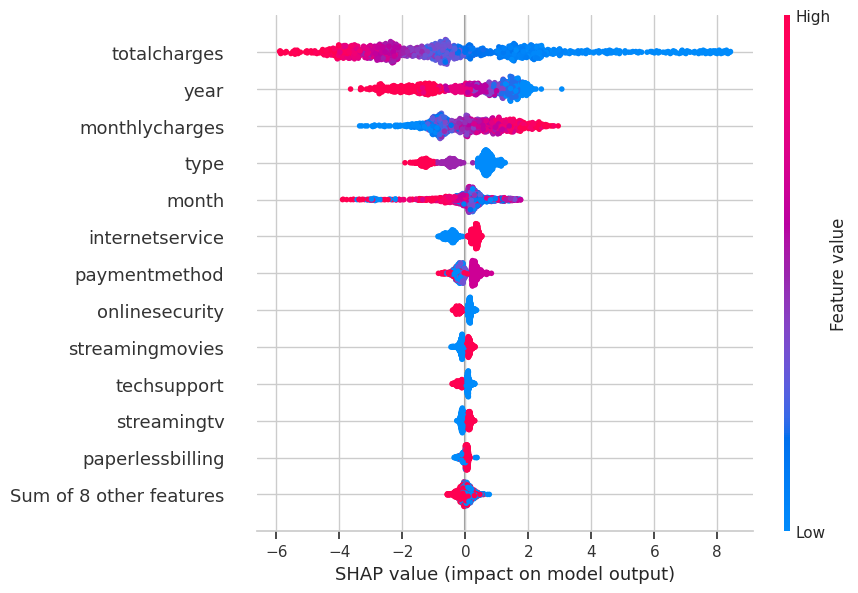

In [ ]:
# Mostramos el impacto de las características en el modelo
shap.plots.beeswarm(
    shap_values[:,:,1],
    max_display=13,
    )

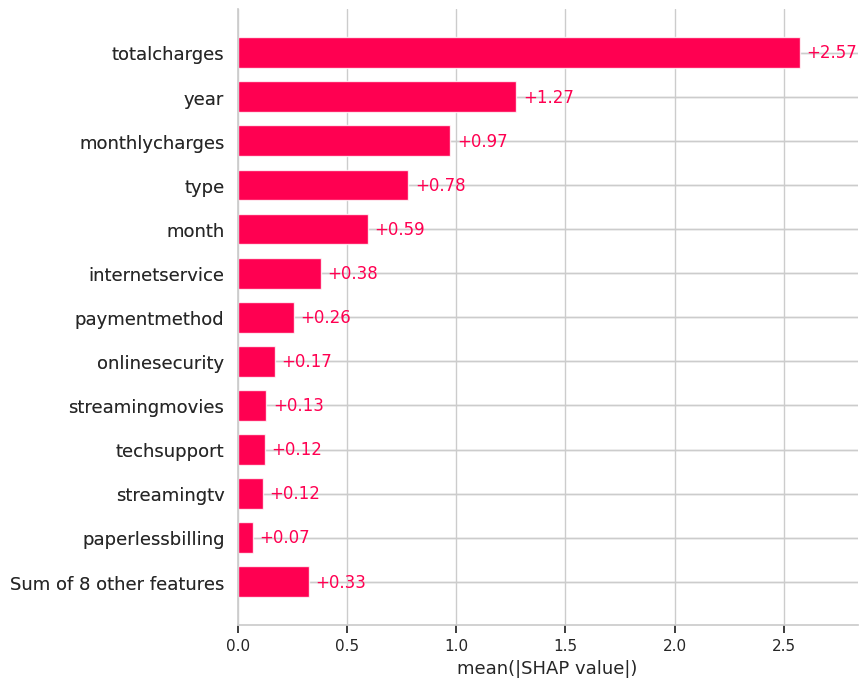

In [ ]:
shap.plots.bar(
    shap_values[:,:,1],
    max_display=13
    )

En este caso las variables 'deviceprotection', 'multiplelines', 'gender',
        'partner', 'dependents' son las que menos aportan, probaremos entrenar nuestro modelo sin ellas.

In [ ]:
# Entrenamos nuevamente el modelo descartando las variables mencionadas
tuned_lgmb_model.fit(X_train_label.drop(columns=['target', 'deviceprotection','multiplelines', 'gender',
        'partner', 'dependents']), y_train)

[LightGBM] [Info] Number of positive: 1394, number of negative: 3019
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 555
[LightGBM] [Info] Number of data points in the train set: 4413, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.315885 -> initscore=-0.772748
[LightGBM] [Info] Start training from score -0.772748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMClassifier(max_depth=5, n_estimators=200, num_leaves=20, random_state=42,
               scale_pos_weight=1)

In [ ]:
lgbm_preds_proba2 = tuned_lgmb_model.predict_proba(X_test_label.drop(columns=['target', 'deviceprotection','multiplelines', 'gender',
        'partner', 'dependents']))[:,1]

In [ ]:
# calculamos el rendimiento
roc_auc_score(y_test, lgbm_preds_proba2)

0.9194669476255007

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades por tu excelente elección al utilizar SHAP para identificar las características más impactantes en tu modelo! El uso de SHAP agrega una capa significativa de interpretabilidad y explicabilidad a tus resultados.

</div>


En este caso el rendimiento bajó. Nos quedaremos con el modelo anterior, con el cual obtuvimos un valor ROC-AUC 0.9214.
También cabe destacar que al utilizar el conjunto etiquetado con target encoder obtuvimos un rendimiento más bajo.

A continuación desarrollaremos un modelo CatBoostClassifier para ver qué ocurre.

### Entrenamiento de CatBoostClassifier



In [ ]:
catboost_classifier = CatBoostClassifier()

In [ ]:
# Seleccionamos hiperparámetros
param_grid = {
    'learning_rate': [0.001, 0.003, 0.008, 0.1],
    'depth': [3, 5, 7, 10],
    'n_estimators': [25, 50, 100],
    'scale_pos_weight': [1, 5, 10, 20]
    }

In [ ]:
grid_search_catboost = GridSearchCV(
    estimator=catboost_classifier,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [ ]:
%%time
# Entrenamos el modelo
grid_search_catboost.fit(X_train_label.drop(columns='target'), y_train)


Fitting 5 folds for each of 192 candidates, totalling 960 fits
0:	learn: 0.6399391	total: 50.6ms	remaining: 5.01s
1:	learn: 0.6012312	total: 54.5ms	remaining: 2.67s
2:	learn: 0.5706417	total: 57.6ms	remaining: 1.86s
3:	learn: 0.5433228	total: 60.9ms	remaining: 1.46s
4:	learn: 0.5242161	total: 64.1ms	remaining: 1.22s
5:	learn: 0.5116190	total: 67.4ms	remaining: 1.05s
6:	learn: 0.4992733	total: 70.5ms	remaining: 937ms
7:	learn: 0.4875302	total: 73.8ms	remaining: 848ms
8:	learn: 0.4752223	total: 77.7ms	remaining: 786ms
9:	learn: 0.4662442	total: 82.5ms	remaining: 742ms
10:	learn: 0.4594103	total: 85.7ms	remaining: 693ms
11:	learn: 0.4532993	total: 88.9ms	remaining: 652ms
12:	learn: 0.4472476	total: 92ms	remaining: 616ms
13:	learn: 0.4422700	total: 95.2ms	remaining: 585ms
14:	learn: 0.4411384	total: 96.6ms	remaining: 548ms
15:	learn: 0.4371953	total: 100ms	remaining: 527ms
16:	learn: 0.4312892	total: 104ms	remaining: 506ms
17:	learn: 0.4278535	total: 107ms	remaining: 486ms
18:	learn: 0.425

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f24a5519510>,
             n_jobs=-1,
             param_grid={'depth': [3, 5, 7, 10],
                         'learning_rate': [0.001, 0.003, 0.008, 0.1],
                         'n_estimators': [25, 50, 100],
                         'scale_pos_weight': [1, 5, 10, 20]},
             scoring='roc_auc', verbose=2)

In [ ]:
# Guardamos el modelo con los mejores hiperparámetros
best_catboost_model = grid_search_catboost.best_estimator_

In [ ]:
catboost_preds_proba = best_catboost_model.predict_proba(X_test_label.drop(columns='target'))[:, 1]

In [ ]:
roc_auc_score(y_test, catboost_preds_proba)

0.9017605843546633

El rendimiento es bastante bueno, pero no superior al modelo LightGMB.

## 6. Conclusión

AL realizar este proyecto:
1. Importamos las librerías necesarias

2. Realizamos una limpieza a los datos. No encontramos valores nulos ni duplicados, corregimos valores extraños y editamos nombres de las columnas. Además agregamos nuevas columnas a partir de la columna 'begindate'.

3. Realizamos el análisis exploratorio de datos (EDA). Aquí revisamos el balance de clases y graficamos la distribución de las variables numéricas.

4. LLevamos a cabo un etiquetado de datos. En este caso creamos dos conjuntos, uno con target encoder y el otro con label encoder. Los datos con label encoder obtuvieron un rendimiento superior.

5. Entrenamos los modelos LightGBMClassifier y CatBoostClassifier, e intentamos mejorar los rendimientos con selección de variables por medio de Shap, aunque esto fue contraproducente. Utilizamos GridSearchCV en ambos modelos para encontrar la mejor combinación de hiperparámetros. El modelo LightGBMClassifier fue el que tuvo el mejor desempeño, con un valor roc-auc de 0.9214 en el conjunto de prueba.




<div class="alert alert-block alert-success">    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Qué gran trabajo has hecho!  &#128077;  Podemos aprobar el proyecto. <br>
Has demostrado un excelente conocimiento en la construcción de modelos, al eliminar variables innecesarias y procesar  los datos antes de entrenar los modelos. <br>
</div>